In [1]:
%matplotlib notebook
import datetime
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 50)

In [2]:
nba_initials = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BRK',
    'Charlotte Hornets': 'CHO',
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'Los Angeles Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP',
    'New York Knicks': 'NYK',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHO',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Washington Wizards': 'WAS'
}

# Load datasets

In [3]:
start_year_summary = 1951
end_year_summary = 2018
start_year_box = 1984
end_year_box = 2018

In [4]:
df_season_summaries_1951_2018 = pd.read_csv("../Data/nba_season_summaries_{}_{}.csv".format(start_year_summary, end_year_summary), index_col=[0, 1])
# For MultiIndex slicing support
df_season_summaries_1951_2018.sort_index(inplace=True) 
df_boxscores_1984_2018 = pd.read_csv("../Data/nba_boxscores_{}_{}.csv".format(start_year_box, end_year_box), index_col=0, parse_dates=[1], infer_datetime_format=True)

In [7]:
df_season_summaries_1951_2018.head()

Rk  Age     W     L    PW    PL   MOV   SOS  \
Season Team                                                                   
1951   Baltimore Bullets       8.0  NaN  24.0  42.0  27.0  39.0 -2.29  0.35   
       Boston Celtics          6.0  NaN  39.0  30.0  34.0  35.0 -0.26 -0.15   
       Fort Wayne Pistons      7.0  NaN  32.0  36.0  29.0  39.0 -1.87  0.07   
       Indianapolis Olympians  9.0  NaN  31.0  37.0  27.0  41.0 -2.37  0.37   
       League Average          NaN  NaN   NaN   NaN  32.0  32.0  0.00  0.00   

                                SRS  ORtg  DRtg  NetRtg   Pace    FTr  3PAr  \
Season Team                                                                   
1951   Baltimore Bullets      -1.94  83.9  86.3    -2.4   96.8  0.364   NaN   
       Boston Celtics         -0.41  87.3  87.6    -0.3   95.9  0.431   NaN   
       Fort Wayne Pistons     -1.81  82.0  83.8    -1.8  102.4  0.403   NaN   
       Indianapolis Olympians -2.00  83.6  86.0    -2.4   96.4  0.329   NaN   
       League Average          0.00  85.1  85.1     0.0   97.4  0.399   NaN   

                                 TS%   eFG%  TOV%  ORB%  FT/FGA  eFG%.1  \
Season Team                                                               
1951   Baltimore Bullets       0.421  0.353   NaN   NaN   0.271     NaN   
       Boston Celtics          0.441  0.368   NaN   NaN   0.312     NaN   
       Fort Wayne Pistons      0.410  0.338   NaN   NaN   0.290     NaN   
       Indianapolis Olympians  0.420  0.363   NaN   NaN   0.236     NaN   
       League Average          0.428  0.357   NaN   NaN   0.293     NaN   

                               TOV%.1  DRB%  FT/FGA.1  \
Season Team                                             
1951   Baltimore Bullets          NaN   NaN       NaN   
       Boston Celtics             NaN   NaN       NaN   
       Fort Wayne Pistons         NaN   NaN       NaN   
       Indianapolis Olympians     NaN   NaN       NaN   
       League Average             NaN   NaN       NaN   

                                                    Arena   Attend.  Attend./G  
Season Team                                                                     
1951   Baltimore Bullets               Baltimore Coliseum       NaN        NaN  
       Boston Celtics                       Boston Garden  197888.0        NaN  
       Fort Wayne Pistons      North Side High School Gym       NaN        NaN  
       Indianapolis Olympians           Hinkle Fieldhouse       NaN        NaN  
       League Average                                 NaN  197888.0        NaN

In [8]:
df_boxscores_1984_2018.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,team2_Pace,team2_eFG%,team2_TOV%,team2_ORB%,team2_FT/FGA,team2_ORtg,team2_DRtg,team2_NetRtg,team1_Pace,team1_eFG%,team1_TOV%,team1_ORB%,team1_FT/FGA,team1_ORtg,team1_DRtg,team1_NetRtg
24793,1983-10-28,1984,0,NaN,CLE,NYK,1381.7836,1585.6497,0.354824,0.645176,1376.2715,1591.1617,NaN,NaN,NaN,NaN,NaN,NaN,106.0,113.0,90.7,0.590,15.6,48.5,0.269,124.5,116.8,7.7,90.7,0.513,15.8,48.6,0.333,116.8,124.5,-7.7
24794,1983-10-28,1984,0,NaN,PHI,WSB,1680.4036,1542.6188,0.797186,0.202814,1682.3088,1540.7135,NaN,NaN,NaN,NaN,NaN,NaN,117.0,114.0,103.5,0.561,18.1,27.8,0.268,110.1,113.0,-2.9,103.5,0.512,16.6,36.6,0.402,113.0,110.1,2.9
24795,1983-10-28,1984,0,NaN,DEN,UTA,1538.7487,1430.0630,0.768754,0.231246,1543.8461,1424.9656,NaN,NaN,NaN,NaN,NaN,NaN,139.0,125.0,108.1,0.500,5.8,21.3,0.250,115.6,128.6,-13.0,108.1,0.539,8.5,41.3,0.284,128.6,115.6,13.0
24796,1983-10-28,1984,0,NaN,POR,SDC,1529.3440,1378.8689,0.808741,0.191259,1533.4425,1374.7704,NaN,NaN,NaN,NaN,NaN,NaN,107.0,93.0,95.0,0.500,17.8,20.6,0.348,97.9,112.6,-14.7,95.0,0.506,15.3,27.3,0.309,112.6,97.9,14.7
24797,1983-10-28,1984,0,NaN,SEA,GSW,1540.0374,1436.8497,0.763080,0.236920,1532.6714,1444.2157,NaN,NaN,NaN,NaN,NaN,NaN,109.0,110.0,101.6,0.472,15.3,47.7,0.292,108.3,107.3,1.0,101.6,0.534,19.1,23.5,0.405,107.3,108.3,-1.0


# Functions for querying/masking

In [9]:
boxscore_season_range_mask = lambda df, start_year, end_year:  (df["season"] >= start_year) & (df["season"] <= end_year)
boxscore_date_range_mask = lambda df, start_date, end_date: (df["date"] >= start_date) & (df["date"] <= end_date)
boxscore_regular_season_mask = lambda df: pd.isnull(df["playoff"])

summary_season_range = lambda df, start_year, end_year: df.loc[start_year:end_year]
summary_season_query = lambda df, years, teams, col_names: df.loc[(years, teams), col_names]
summary_season_remove_league_average = lambda: df

# Cleaning data for plotting

In [10]:
# Remove league averages and remove 1954-1955 Baltimore Bullets for which no data except average age is available
df_season_summaries_1951_2018 = df_season_summaries_1951_2018.dropna(subset=["W", "L", "SRS", "ORtg", "DRtg", "NetRtg", "eFG%", "TS%"])

# Visualization 1) Wins vs. SRS, NetRtg, TS%, eFG%

In [11]:
df_season_summaries_1951_2017 = summary_season_range(df_season_summaries_1951_2018, 1984, 2017)
pearsonR = df_season_summaries_1951_2017[["W", "SRS"]].corr().loc["W"]["SRS"]

<IPython.core.display.Javascript object>


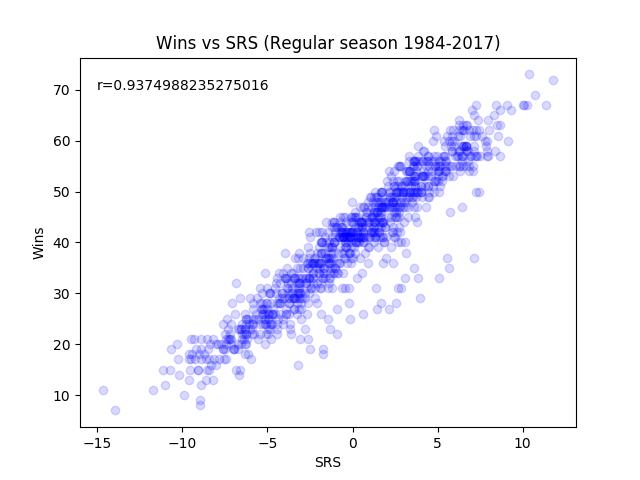

In [12]:
plt.figure(1)
ax = plt.subplot(111)
ax.set_title("Wins vs SRS (Regular season 1984-2017)")
ax.set_ylabel("Wins")
ax.set_xlabel("SRS")
ax.text(-15,70, "r={}".format(pearsonR))
ax.scatter(df_season_summaries_1951_2017["SRS"], df_season_summaries_1951_2017["W"], c='b', alpha=0.15)